In [14]:
from deepface import DeepFace
from keras_vggface.vggface import VGGFace
import scipy  
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np
from keras_vggface import utils


In [15]:
ala1=cv2.imread('ala2.png')
ala2=cv2.imread('ala3.jpg')

In [16]:
cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
faces = cascade.detectMultiScale(cv2.cvtColor(ala2, cv2.COLOR_BGR2GRAY), 1.1, 7)
for (x, y, w, h) in faces:
    cv2.rectangle(ala2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    img=ala2[y:y+h,x:x+w]
img=cv2.resize(img,(224,224))


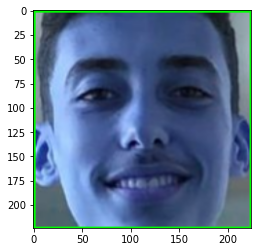

In [17]:
plt.imshow(img)

[[278  73 141 141]]


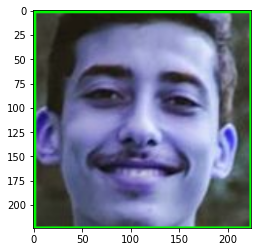

In [18]:
faces = cascade.detectMultiScale(cv2.cvtColor(ala1, cv2.COLOR_BGR2GRAY), 1.1, 7)
for (x, y, w, h) in faces:
    cv2.rectangle(ala1, (x, y), (x + w, y + h), (0, 255, 0), 2)
    img2=ala1[y:y+h,x:x+w]
img2=cv2.resize(img2,(224,224))
plt.imshow(img2)
print(faces)

In [19]:
vgg_features = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3),
                               pooling='avg')  # pooling: None, avg or max

In [20]:
 
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=2)
img = vgg_features(x)


In [21]:
 
x = tf.keras.preprocessing.image.img_to_array(img2)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1)
img2 = vgg_features(x)

In [22]:
from scipy.spatial import distance

d=distance.cosine(img,img2)

In [23]:
img2=tf.keras.preprocessing.image.img_to_array(img2).tolist()
img2=np.array(img2)

In [24]:
img=tf.keras.preprocessing.image.img_to_array(img).tolist()
img=np.array(img)

In [25]:
d=distance.cosine(img,img2)

In [26]:
d

0.2362592318021456